# MODIS Sea-ice

In [30]:
import xarray as xr
xr.set_options(display_style='html')
import cftime
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import cartopy.crs as ccrs
from cmcrameri import cm
import pandas as pd
import numpy as np
%matplotlib inline
import s3fs

# Satellite (MODIS)

In [5]:
fs = s3fs.S3FileSystem(anon=False,
client_kwargs={'endpoint_url': 'https://forces2021.uiogeo-apps.sigma2.no/'})

#Choose the year to load satellite data (2012-2019)
i = 2013

#Satellite data
s3path = 's3://data/ASMR2/seaiceconc/'+str(i)+'/*.nc'
print('Reading sea ice concentration from year '+str(i))
remote_files = fs.glob(s3path)
fileset = [fs.open(file) for file in remote_files]
d2019 = xr.open_mfdataset(fileset, combine='nested',concat_dim=['time'])
d2019['time'] = pd.to_datetime(list(map(lambda x: x[43:51],remote_files)))

Reading sea ice concentration from year 2013


In [11]:
d2019.polar_stereographic

<xarray.DataArray 'polar_stereographic' (time: 239)>
array([b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'', b'', b''], dtype='|S1')
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 2013-01-02 ... 2013-12-31
Attributes:
    grid_mapping_name:                      polar_stereographic
    straight_vertical_longitude_from_pole:  [-45.]
    false_easting:                          [0.]
    false_northing:                         [0.]
    latitude_of_projection_origin:          [90.]
    standard_parallel:                      [70.]
    long_name:                              CRS definition
    longitude_of_prime_meridian:            [0.]
    semi_major_axis:                        [6378273.]
    inverse_flattening:                     [298.27941112]
    spatial_ref:                            PROJCS["NSIDC Sea Ice Polar Stere...
    GeoTransform:                           -3850000 6250 0 5850000 0 -6250

## Plotting one date 

In [47]:
def polarCentral_set_latlim(lat_lims, ax):
    ax.set_extent([-180, 180, lat_lims[0], lat_lims[1]], ccrs.PlateCarree())
    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax.set_boundary(circle, transform=ax.transAxes)

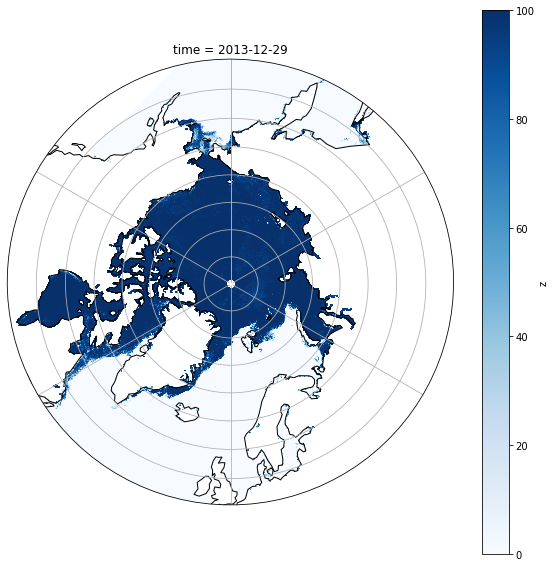

In [44]:
fig = plt.figure(1, figsize=[10,10])

# Fix extent
minval = 0
maxval = 100.

ax = plt.subplot(1, 1, 1, projection=ccrs.NorthPolarStereo())
ax.coastlines()
ax.gridlines()
polarCentral_set_latlim([50,90], ax)
d2019.z.sel(time='2013.12.29').plot(ax=ax, vmin=minval, vmax=maxval, transform=ccrs.NorthPolarStereo(central_longitude=-45, true_scale_latitude=70), cmap='Blues')